In [6]:
!kaggle datasets download -d shayanfazeli/heartbeat

Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
 96% 95.0M/98.8M [00:00<00:00, 165MB/s]
100% 98.8M/98.8M [00:00<00:00, 151MB/s]


In [7]:
import zipfile

# Unzip the dataset
with zipfile.ZipFile('heartbeat.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset_directory')

In [8]:
!wget -nc https://raw.githubusercontent.com/rapidsai/rapidsai-csp-utils/main/colab/rapids-colab.sh
!bash rapids-colab.sh 22.12

--2024-10-06 17:11:18--  https://raw.githubusercontent.com/rapidsai/rapidsai-csp-utils/main/colab/rapids-colab.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2516 (2.5K) [text/plain]
Saving to: ‘rapids-colab.sh’

rapids-colab.sh     100%[===================>]   2.46K  --.-KB/s    in 0s      

2024-10-06 17:11:19 (43.4 MB/s) - ‘rapids-colab.sh’ saved [2516/2516]

PLEASE READ FOR 21.06
********************************************************************************************************
Another release, another script change.  We had to revise the script, which now:
1. Does a more comprehensive install
2. Includes BlazingSQL
3. is far easier for everyone to understand and maintain

The script will require you to add these 5 cells to your notebook.  We ha

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [95]:
df = pd.read_csv('dataset_directory/mitbih_train.csv',header = None)

In [96]:
pd.set_option('display.max_columns', 188)
pd.set_option('display.max_rows', 188)
zeros_in_columns = (df == 0).sum()
print(zeros_in_columns)

0       2778
1        689
2       1589
3      10871
4       4062
5       2230
6       1628
7       1818
8       1611
9       1178
10      1323
11      1368
12      1386
13      1227
14       734
15       524
16       474
17       469
18       425
19       400
20       366
21       389
22       390
23       556
24       792
25      1101
26      1162
27       951
28       871
29       777
30       742
31       793
32       948
33       965
34       679
35       497
36       418
37       414
38       414
39       453
40       473
41       514
42       523
43       562
44       615
45       644
46       680
47       755
48       843
49       953
50       955
51       972
52      1028
53      1144
54      1253
55      1401
56      1558
57      1712
58      1819
59      1950
60      2137
61      2314
62      2456
63      2690
64      2877
65      3016
66      3247
67      3567
68      3788
69      4109
70      4366
71      4695
72      5027
73      5517
74      6084
75      6664
76      7256

In [97]:
columns_to_drop = df.columns[91:187]
df = df.drop(columns=columns_to_drop)
X_train= df.iloc[:,:-1]
y_train= df.iloc[:,-1]

In [98]:
df1 = pd.read_csv('/content/dataset_directory/mitbih_test.csv',header = None)

In [99]:
columns_to_drop = df1.columns[91:187]
df1 = df1.drop(columns=columns_to_drop)
X_test= df1.iloc[:,:-1]
y_test= df1.iloc[:,-1]

In [100]:
df[187].value_counts()

,count
187,
0.0,72471
4.0,6431
2.0,5788
1.0,2223
3.0,641


In [101]:
df.isnull().sum().sum()

0

In [102]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,0.198778,0.203550,0.208776,0.212885,0.218393,0.224966,0.231377,0.237123,0.242582,0.247923,0.253749,0.259748,0.266244,0.272734,0.279355,0.285588,0.291808,0.297672,0.303384,0.308795,0.313890,0.318454,0.322087,0.324891,0.326737,0.327817,0.327931,0.326746,0.324326,0.320537,0.316234,0.311407,0.306520,0.301696,0.297087,0.292225,0.287838,0.283965,0.280724,0.278051,0.276432,0.275132,0.274152,0.273004,0.272354,0.271696,0.271413,0.271276,0.271590,0.272307,0.273436,0.274492,0.275570,0.276823,0.278993,0.281349,0.282139,0.280225,0.276547,0.272064,0.268006,0.264239,0.260910,0.257082,0.254712,0.254155,0.255646,0.257813,0.259830,0.259958,0.258528,0.256549,0.255682,0.254850,0.253470,0.251946,0.250425,0.247326,0.241640,0.234124,0.226143,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,0.171796,0.176496,0.180274,0.184101,0.186963,0.190002,0.193899,0.198465,0.202855,0.207166,0.211187,0.214821,0.218450,0.221486,0.224031,0.225848,0.227133,0.227830,0.228436,0.228871,0.228760,0.228393,0.227472,0.226180,0.224659,0.223110,0.221352,0.219258,0.216884,0.214168,0.211376,0.208345,0.205248,0.202408,0.199396,0.196035,0.192853,0.190098,0.187177,0.184445,0.182808,0.181787,0.181298,0.181269,0.181441,0.181822,0.182448,0.182894,0.183362,0.184835,0.186782,0.189142,0.191302,0.194266,0.199152,0.204516,0.207968,0.208543,0.206911,0.205191,0.204277,0.203534,0.201664,0.200456,0.200736,0.203266,0.207795,0.214458,0.220490,0.224636,0.228316,0.231903,0.237467,0.242170,0.244514,0.247707,0.250751,0.251927,0.250479,0.247448,0.242607,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.

In [103]:
def MultiClassificationXGB(X,y):
  # Create the XGBoost model
  model = XGBClassifier(objective='multi:softmax',
                          num_class=4,
                          random_state=42,
                          eval_metric='logloss',
                          n_estimators = 1000 ,
                          learning_rate = .1 ,
                          subsample =.8 ,
                          colsample_bytree = .8 ,
                          max_depth = 6)

  smote = SMOTE(sampling_strategy="auto", random_state=42)
  X_resampled, y_resampled = smote.fit_resample(X, y)

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  scores = cross_val_score(model, X_resampled, y_resampled, cv=stratified_kfold, scoring='recall_weighted')

  print("Cross-Validation Recall: ", scores.mean())
  print("\n")
  # Fit the model on the resampled dataset
  model.fit(X_resampled, y_resampled)
  return model

In [104]:
def BinaryClassificationXGB(X,y):
  count_class_0, count_class_1 = np.bincount(y)
  scale_pos_weight = count_class_0 / count_class_1

  # Create the XGBoost model
  model = XGBClassifier(
      objective='binary:logistic',   # Binary classification
      scale_pos_weight=scale_pos_weight,  # Adjust for class imbalance
      eval_metric='logloss'  ,        # Suppress warning
      random_state=42
  )
  smote = SMOTE(sampling_strategy='auto', random_state=42)
  X_resampled, y_resampled = smote.fit_resample(X, y)

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  scores = cross_val_score(model, X_resampled, y_resampled, cv=stratified_kfold, scoring='recall_weighted')

  print("Cross-Validation Recall: ", scores.mean())
  print("\n")
  # Fit the model on the resampled dataset
  model.fit(X_resampled, y_resampled)
  return model

In [105]:
def ComputeXYtrain(columntobe0=0):
  if columntobe0 == 0:
    df2= df.copy()
    df2[187] = df2[187].apply(lambda x: 0 if x == columntobe0 else 1)
    df2[187].value_counts()
    X= df2.iloc[:,:-1]
    y= df2.iloc[:,-1]
  else:
    df2= df.copy()
    df2.drop(df2[df2[187] == 0].index, inplace=True)
    df2[187].value_counts()
    X= df2.iloc[:,:-1]
    y= df2.iloc[:,-1]
  return X,y

In [106]:
def ComputeXYtest(columntobe0=0):
  if columntobe0 == 0:
    df2= df1.copy()
    df2[187] = df2[187].apply(lambda x: 0 if x == columntobe0 else 1)
    df2[187].value_counts()
    X= df2.iloc[:,:-1]
    y= df2.iloc[:,-1]
  else:
    df2= df1.copy()
    df2.drop(df2[df2[187] == 0].index, inplace=True)
    df2[187].value_counts()
    X= df2.iloc[:,:-1]
    y= df2.iloc[:,-1]
  return X,y

In [107]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    print(f"Recall: {recall}")
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

In [108]:
def evaluate_model_multi(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = y_pred + 1
    recall = recall_score(y_test, y_pred, average='macro')
    print(f"Recall: {recall}")
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

In [109]:
X0,y0 = ComputeXYtrain(0)
X1,y1 = ComputeXYtrain(1)
y1 = y1.apply(lambda x: x-1)
#y1.value_counts()
print(X0.shape)
print(y0.shape)
print(X1.shape)
print(y1.shape)

(87554, 91)
(87554,)
(15083, 91)
(15083,)


In [110]:
model0 = BinaryClassificationXGB(X0,y0)
model1 = MultiClassificationXGB(X1,y1)

Cross-Validation Recall:  0.9751003819756567


Cross-Validation Recall:  0.9891541411054534




In [111]:
Xt0,yt0 = ComputeXYtest(0)
Xt1,yt1 = ComputeXYtest(1)
print(Xt0.shape)
print(yt0.shape)
print(Xt1.shape)
print(yt1.shape)

(21892, 91)
(21892,)
(3774, 91)
(3774,)


In [112]:
evaluate_model(model0,Xt0,yt0)
evaluate_model_multi(model1,Xt1,yt1)

Recall: 0.9560148383677796
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97     18118
           1       0.83      0.96      0.89      3774

    accuracy                           0.96     21892
   macro avg       0.91      0.96      0.93     21892
weighted avg       0.96      0.96      0.96     21892

Recall: 0.9518210825547162
Classification Report:
               precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       556
         2.0       0.97      0.97      0.97      1448
         3.0       0.83      0.90      0.86       162
         4.0       0.99      0.99      0.99      1608

    accuracy                           0.97      3774
   macro avg       0.94      0.95      0.95      3774
weighted avg       0.97      0.97      0.97      3774



In [117]:
def eval_whole_model(model0,model1,X_test,y_test):
  y_pred = []
  for i in range(len(y_test)):
      pred1 = model0.predict(X_test.iloc[i].values.reshape(1, -1))
      if pred1 == 0:
          y_pred.append(pred1)
      else:
          pred2 = model1.predict(X_test.iloc[i].values.reshape(1, -1))+1
          y_pred.append(pred2)
  return y_pred

In [118]:
y_pred = eval_whole_model(model0,model1,X_test,y_test)

In [31]:
y_pred1 = eval_whole_model(model0,model1,model2,model3,X_train,y_train)

In [119]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     18118
         1.0       0.55      0.79      0.65       556
         2.0       0.84      0.95      0.90      1448
         3.0       0.58      0.83      0.68       162
         4.0       0.94      0.98      0.96      1608

    accuracy                           0.96     21892
   macro avg       0.78      0.90      0.83     21892
weighted avg       0.96      0.96      0.96     21892



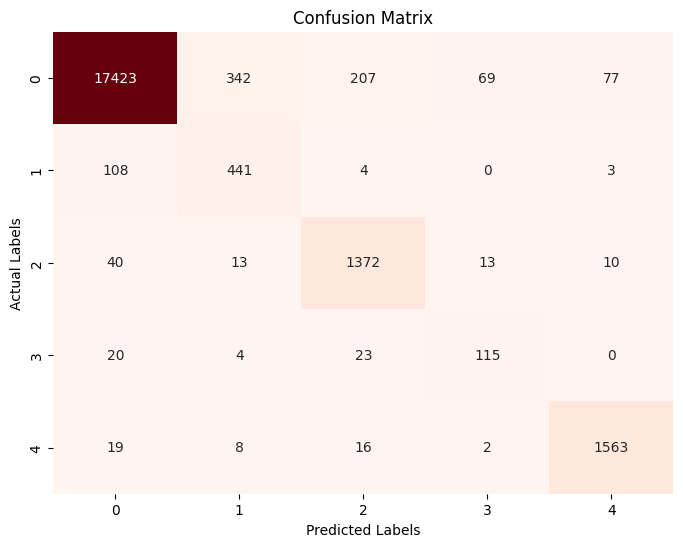

In [39]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [34]:
report = classification_report(y_train, y_pred1)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     72471
         1.0       0.53      1.00      0.69      2223
         2.0       1.00      1.00      1.00      5788
         3.0       0.95      1.00      0.98       641
         4.0       1.00      1.00      1.00      6431

    accuracy                           0.98     87554
   macro avg       0.90      0.99      0.93     87554
weighted avg       0.99      0.98      0.98     87554



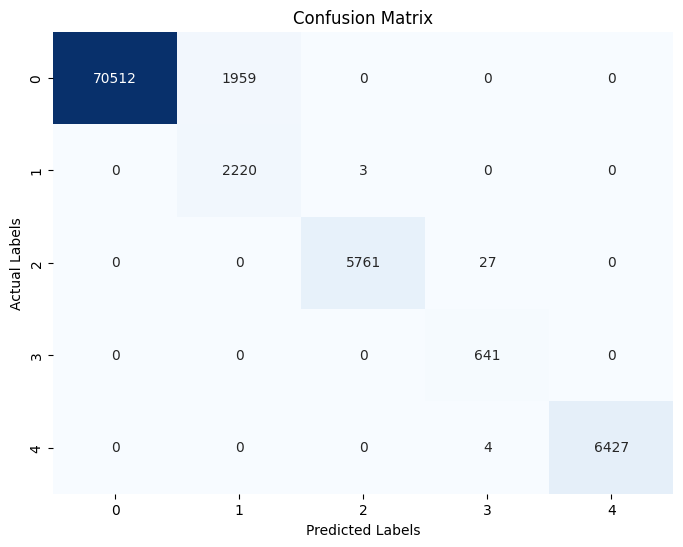

In [35]:
cm1 = confusion_matrix(y_train, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [120]:
import pickle

with open('Binary_model.pkl', 'wb') as f:
    pickle.dump(model0, f)

with open('Multi_model.pkl', 'wb') as f:
    pickle.dump(model1, f)


In [121]:
from google.colab import files
files.download('Multi_model.pkl')
files.download('Binary_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>